### Name: Divesh Giri

## The Sparks Foundation 
## GRIP - TASK 3 -- Exploratory Data Analysis  Retail 
- Performe Exploratory Data Analysis on dataset SampleSuperStore.
- Find out the weak areas where more profit can be generated.

## 1. Import all the required libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Load the dataset

In [2]:
df = pd.read_csv('./data/SampleSuperstore.csv')
df.shape

(9994, 13)

In [3]:
df.head() # first 5 rows of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail() #last 5 rows of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Our dataset is composed of <b>9994</b> rows (entries) and <b>13</b> columns (attributes/features). There are also not any null values in the dataset which is to be cared of.

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 3. Data Preprocessing

Cheking the value counts for all the categorical data in our dataset.

In [7]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [8]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In our dataset, there is not any other country except United States. So the Country column is not beneficial for the EDA of our dataset, so we can remove it.

In [10]:
df.drop('Country',axis=1,inplace=True)

In [11]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Holyoke            1
Yucaipa            1
Rogers             1
Danbury            1
Ormond Beach       1
Name: City, Length: 531, dtype: int64

In [12]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

The Postal Code is not helpful in data insight so we can remove it.

In [13]:
df.drop('Postal Code',axis=1,inplace=True)

In [14]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [15]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [16]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Checking if there are any duplicates entries in our dataset.

In [17]:
df.duplicated().sum()

50

There are <b>50</b> duplicated entries in our dataset, so we can drop those entries from our dataset.

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(9944, 11)

## 4. Exploratory Data Analysis

Correlation Matrix :- Correlation matrix tell us about the relation between of features between each other.

In [20]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


Lets a plot a heatmap to understand it better.

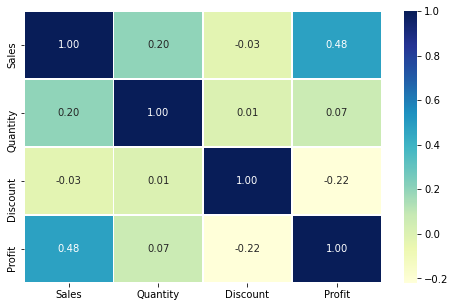

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True, linewidths=0.5,fmt='.2f',cmap='YlGnBu');

From the above heatmap, it is cleared that Sales and Profit relationship is higher than others.

In [22]:
# Covariance 
df.cov()

,Sales,Quantity,Discount,Profit
Sales,390181.082925,279.088165,-3.693757,70277.064208
Quantity,279.088165,4.967335,0.003825,34.591355
Discount,-3.693757,0.003825,0.042677,-10.670204
Profit,70277.064208,34.591355,-10.670204,55150.469191


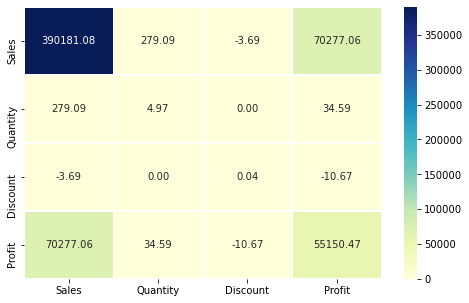

In [23]:
#On HeatMap
cov = df.cov()
plt.figure(figsize=(8,5))
sns.heatmap(cov,annot=True, linewidths=0.5,fmt='.2f',cmap='YlGnBu');

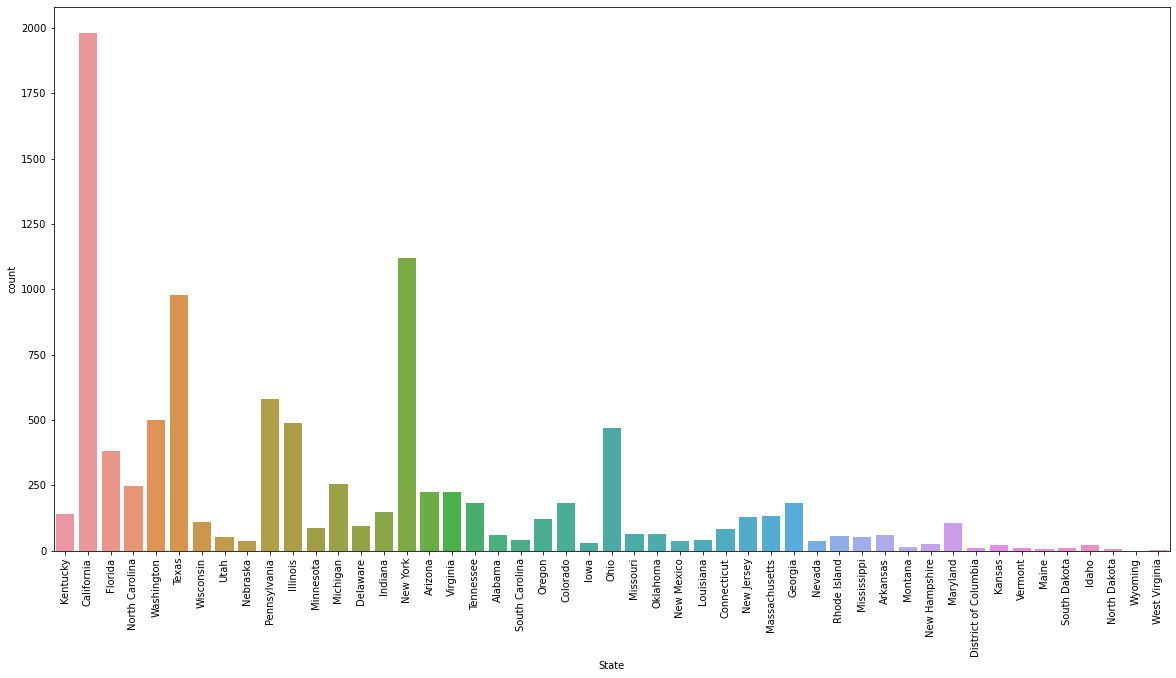

In [114]:
# State wise
plt.figure(figsize=(20,10))
sns.countplot(x=df['State'])
plt.xticks(rotation=90);

From above the graph, we can see that most of our dataset entries are from california.

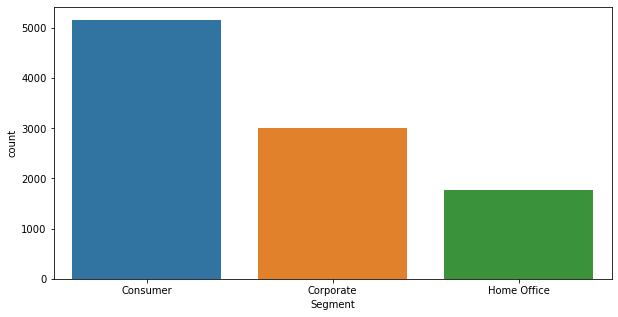

In [25]:
# Segment CountPlot
plt.figure(figsize=(10,5))
sns.countplot(x=df['Segment'])
plt.xticks(rotation=0);

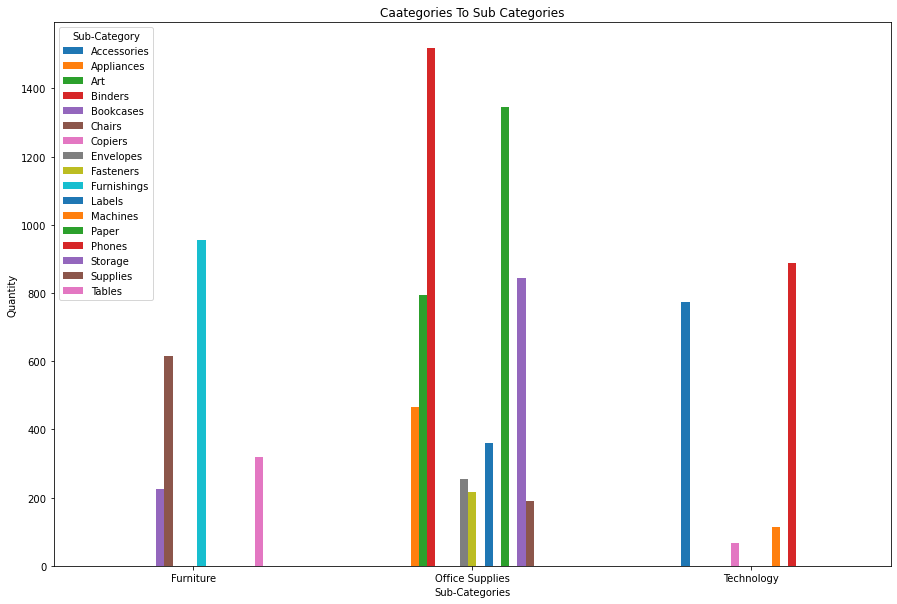

In [26]:
# Crosstab of Category and Sub Category
pd.crosstab(df['Category'],df['Sub-Category']).plot(kind='bar',
                                                   figsize=(15,10))

plt.title("Caategories To Sub Categories")
plt.xlabel("Sub-Categories")
plt.ylabel("Quantity")
plt.xticks(rotation=0);

Above Bar Graphs shows the Sub Categories quantity in each categories.

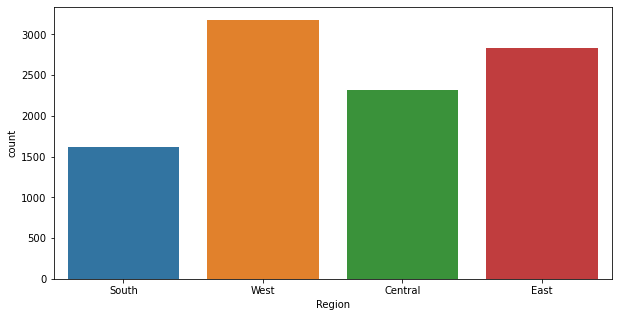

In [27]:
# Regions
plt.figure(figsize=(10,5))
sns.countplot(x=df['Region'])
plt.xticks(rotation=0);

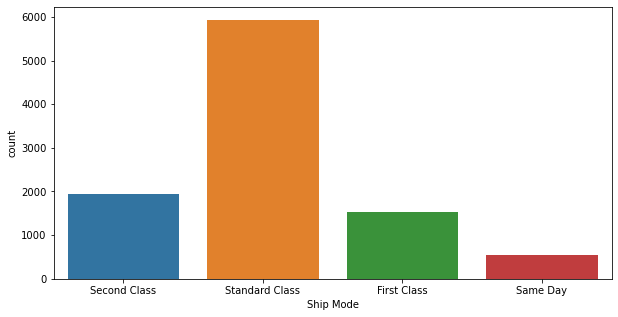

In [28]:
# Ship Mode
plt.figure(figsize=(10,5))
sns.countplot(x=df['Ship Mode'])
plt.xticks(rotation=0);

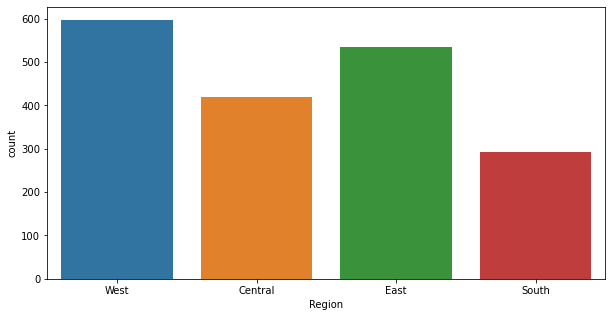

In [88]:
# Technology Products in Different Regions
plt.figure(figsize=(10,5))
sns.countplot(x=df[df['Category'] == 'Technology']['Region'])
plt.xticks(rotation=0);

###### FEATURES VS PROFIT

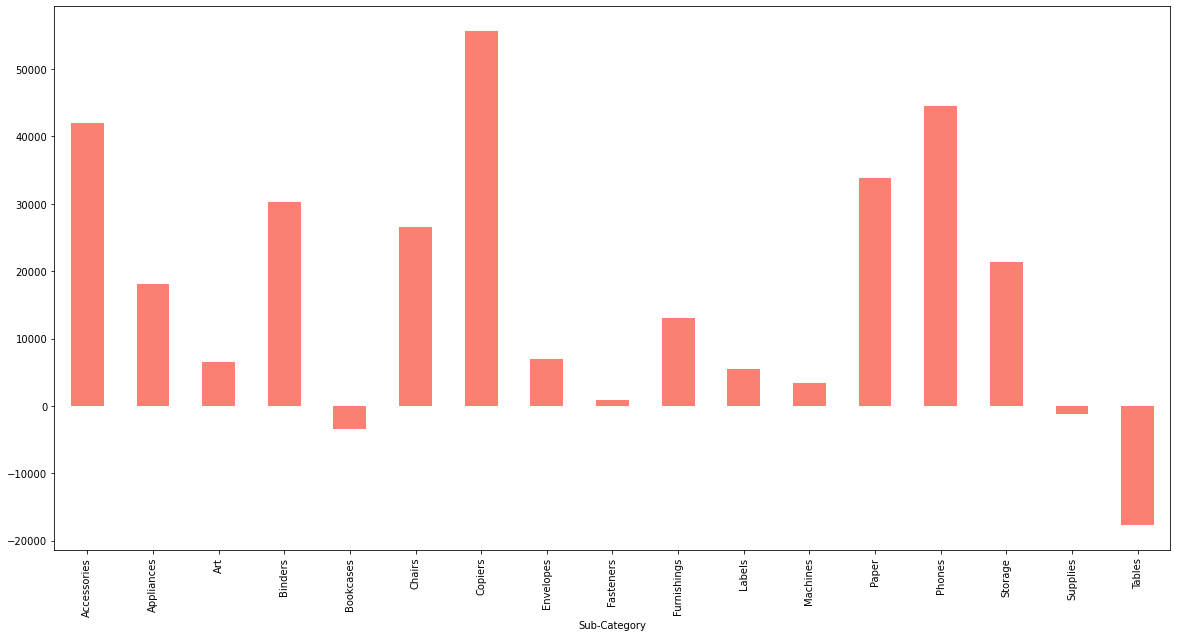

In [96]:
# Sub-Category vs Profit
df.groupby('Sub-Category').sum()['Profit'].plot(figsize=(20,10),kind='bar', color='salmon')
plt.xticks(rotation=90);

From the above the Bar Graph, we can see that,
1. <b>Copiers</b> are highly profitable subcategory.
2. <b>Tables</b> are highly non profitable subcategory.

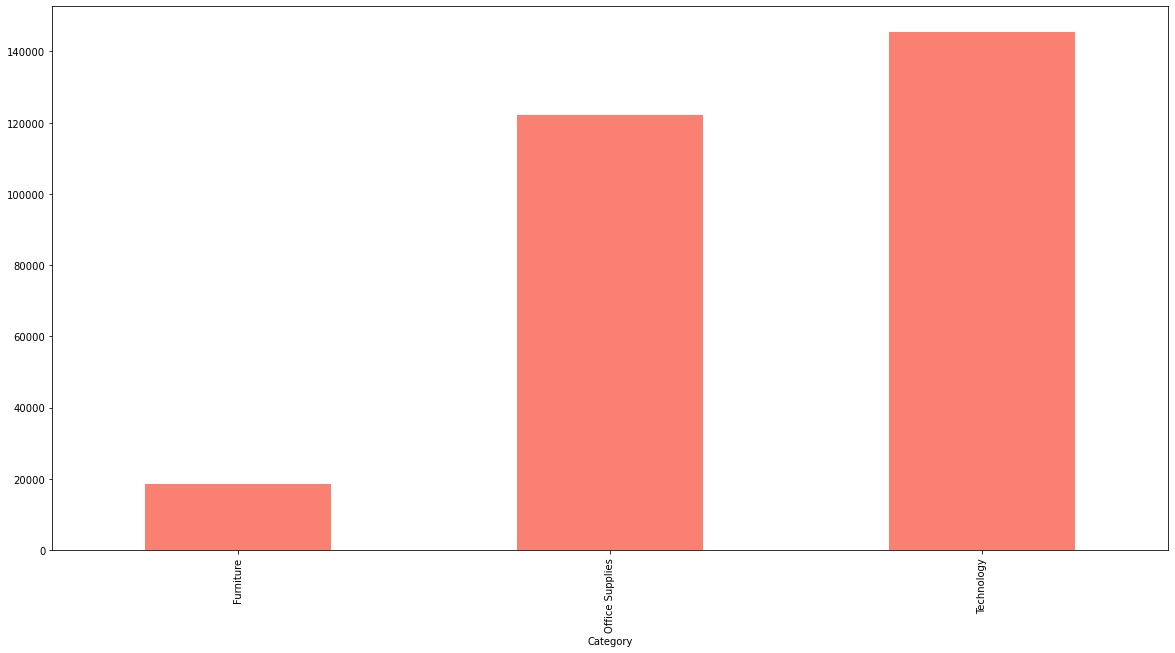

In [95]:
# Category vs Profit
df.groupby('Category').sum()['Profit'].plot(figsize=(20,10),kind='bar', color='salmon');

From the above graph, we can assume that
1. <b>Technolgy</b> is high profitable.
2. <b>Office Supplies</b> is non profitable.

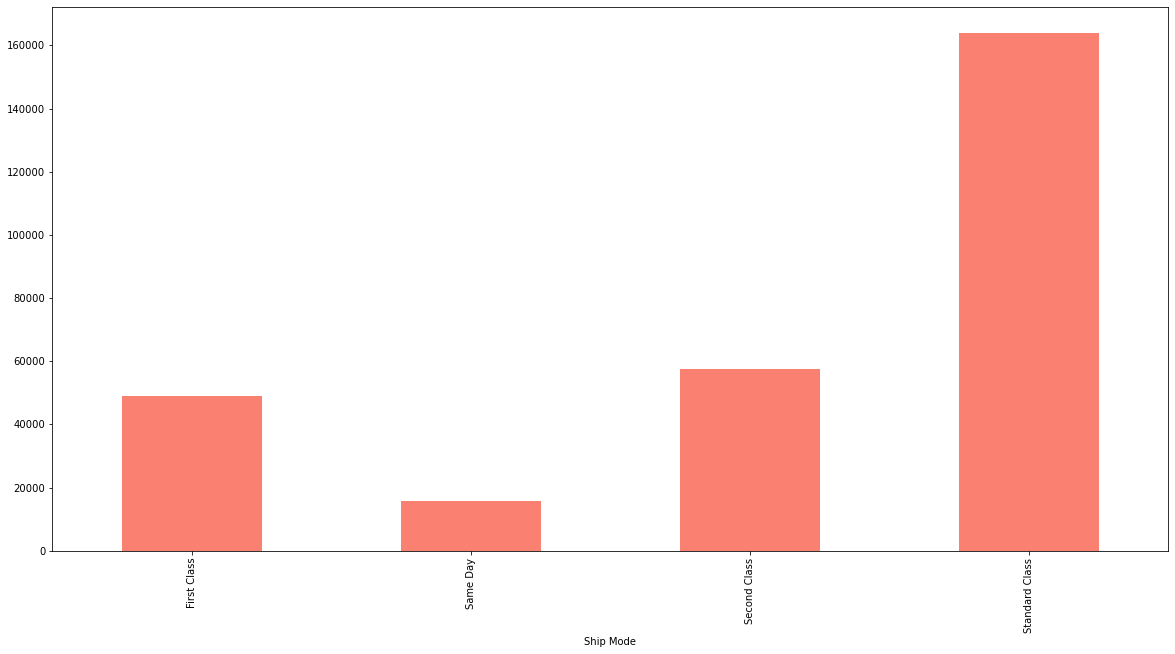

In [94]:
# Ship Mode Vs Profit
df.groupby('Ship Mode').sum()['Profit'].plot(figsize=(20,10), kind='bar', color='salmon');

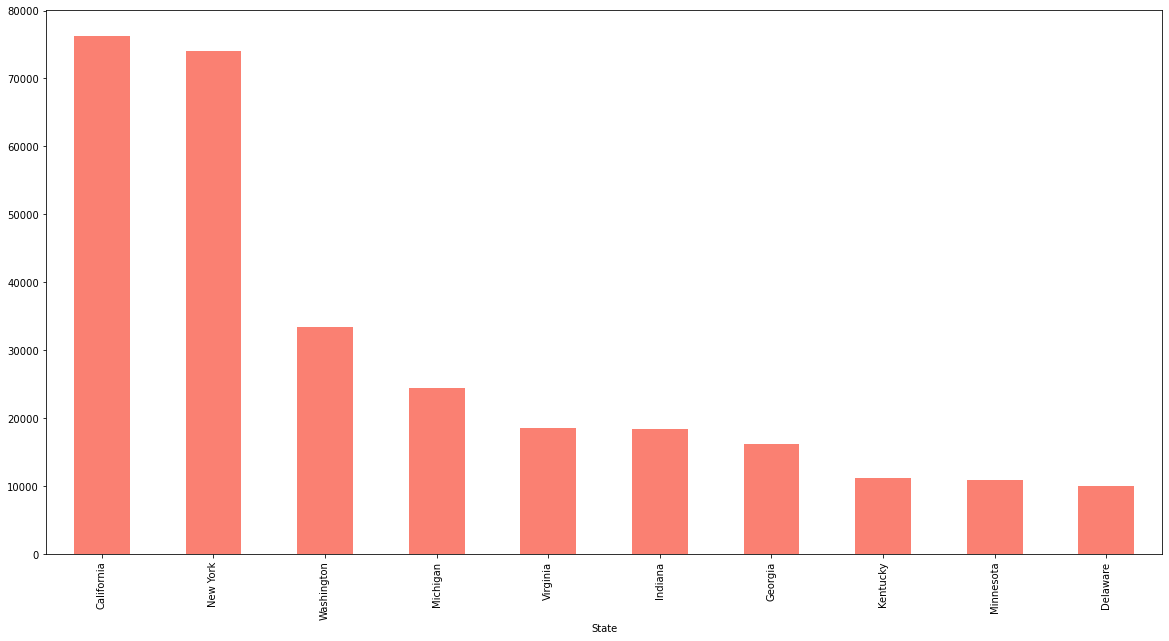

In [109]:
# Top 10 max profitable state
df.groupby('State').sum()['Profit'].sort_values(ascending=False).head(10).plot(figsize=(20,10), kind='bar', color='salmon');

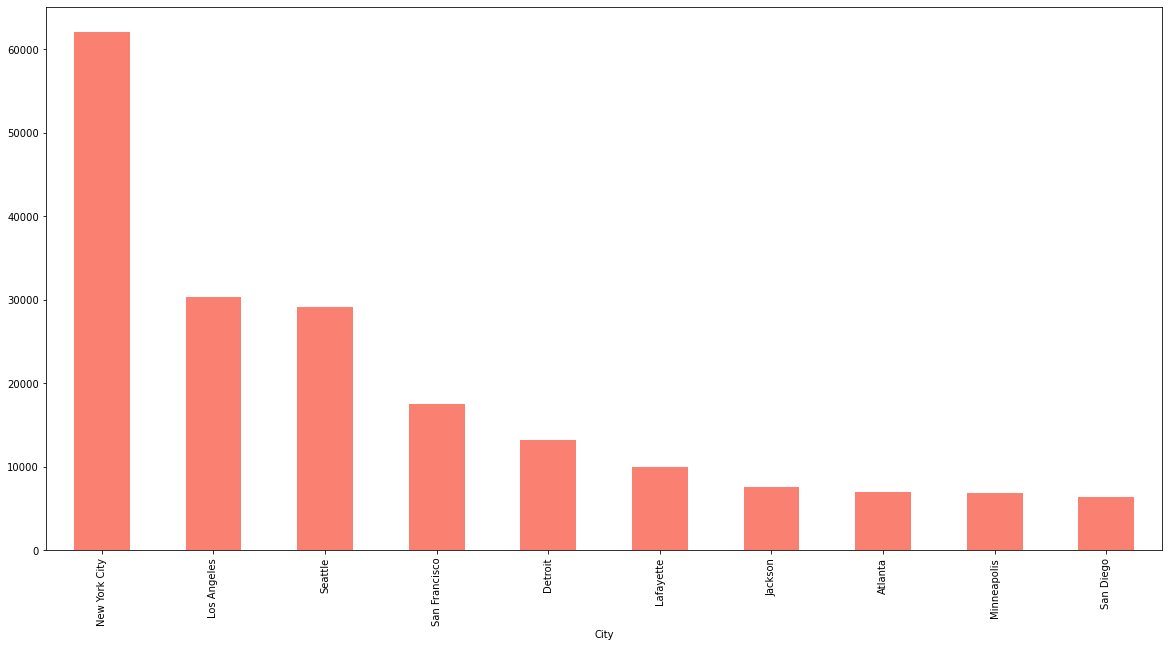

In [93]:
# Top 10 max Profitable Cities
df.groupby('City').sum()['Profit'].sort_values(ascending=False).head(10).plot(figsize=(20,10), kind='bar', color='salmon');

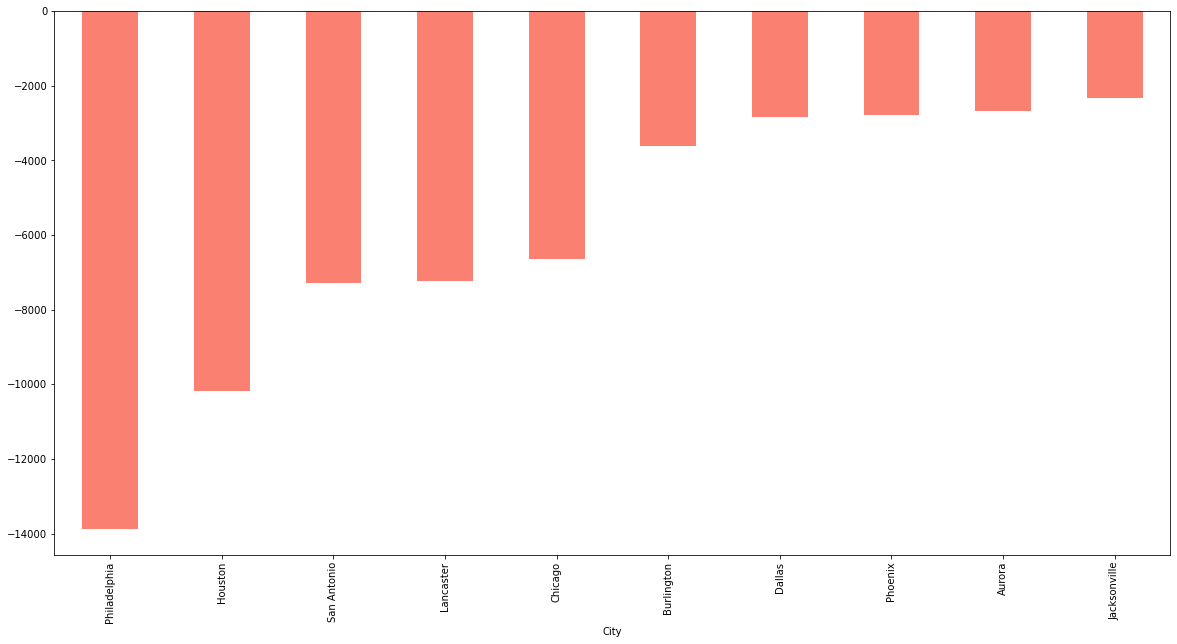

In [91]:
# 10 most non profitable cities
df.groupby('City').sum()['Profit'].sort_values().head(10).plot(figsize=(20,10), kind='bar', color='salmon');

<AxesSubplot:xlabel='Region'>

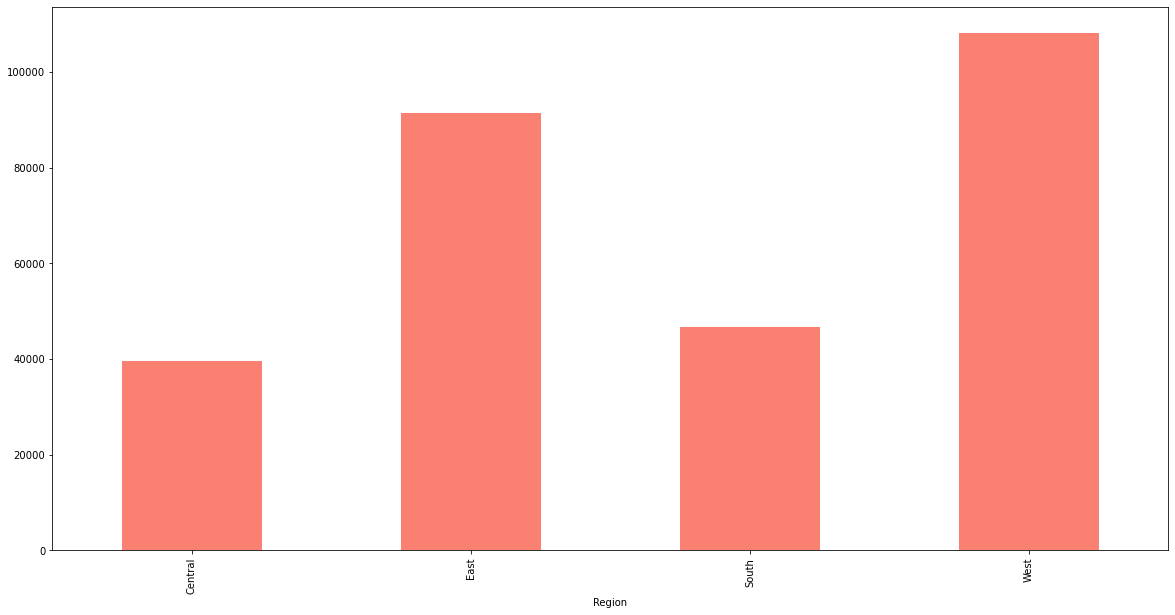

In [92]:
# Highly Profitable Regions
df.groupby('Region').sum()['Profit'].plot(figsize=(20,10), kind='bar', color='salmon')

#### FEATURES VS SALES

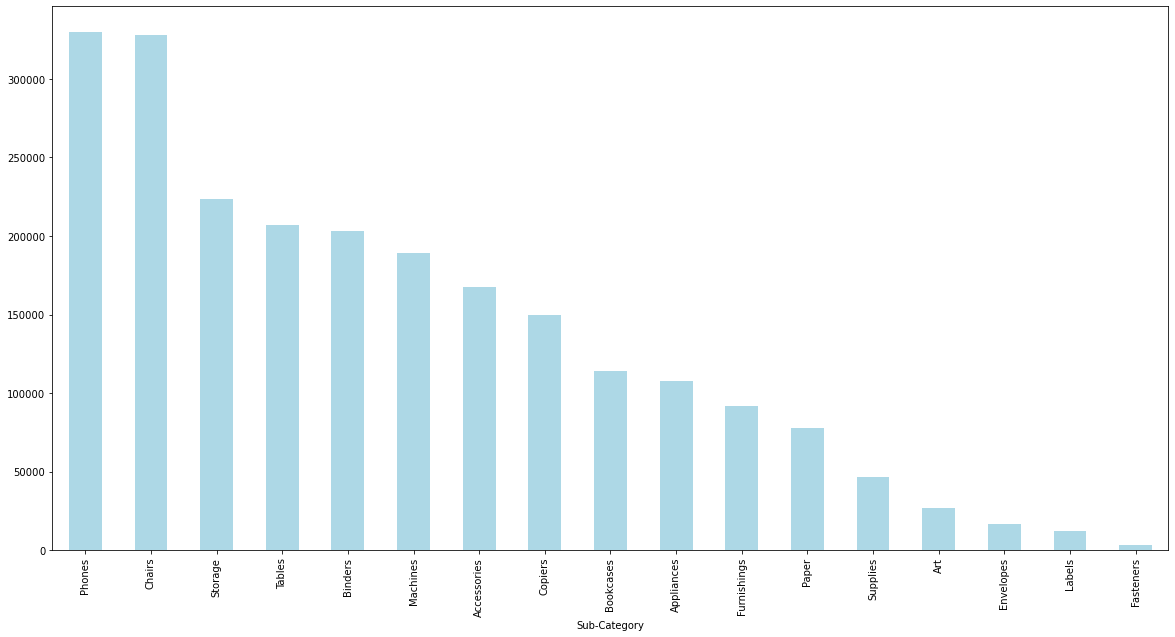

In [99]:
# Sub Category Vs Sales
df.groupby('Sub-Category').sum()['Sales'].sort_values(ascending=False).plot(figsize=(20,10),kind='bar', color='lightblue')
plt.xticks(rotation=90);

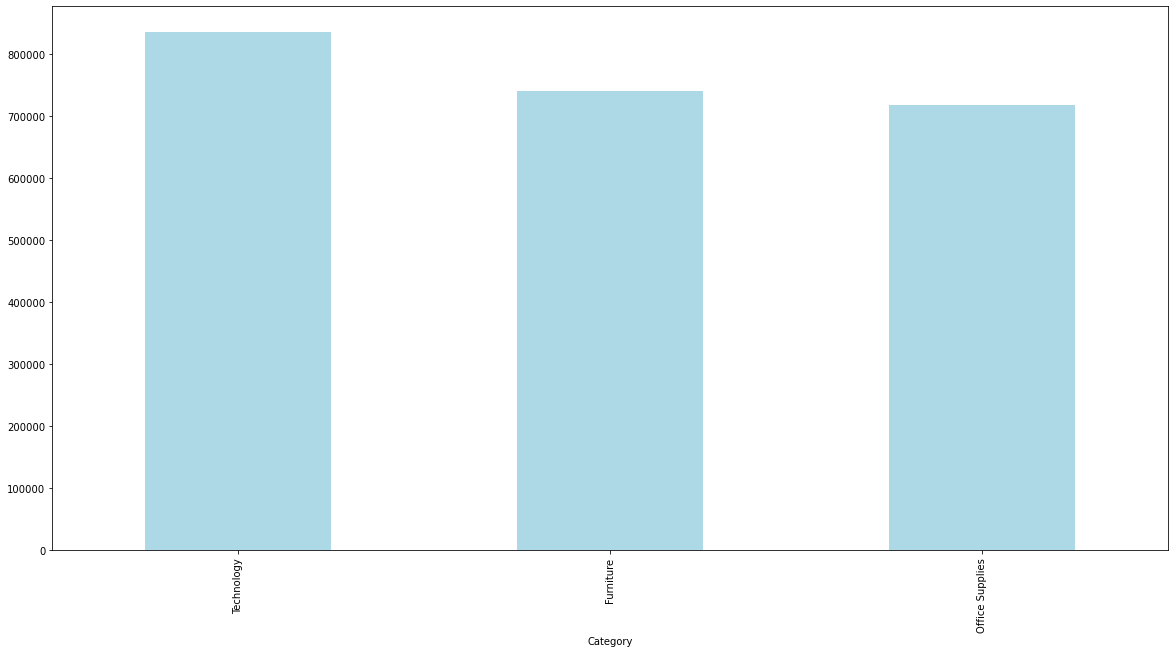

In [100]:
#Category Vs Sales
df.groupby('Category').sum()['Sales'].sort_values(ascending=False).plot(figsize=(20,10),kind='bar', color='lightblue')
plt.xticks(rotation=90);

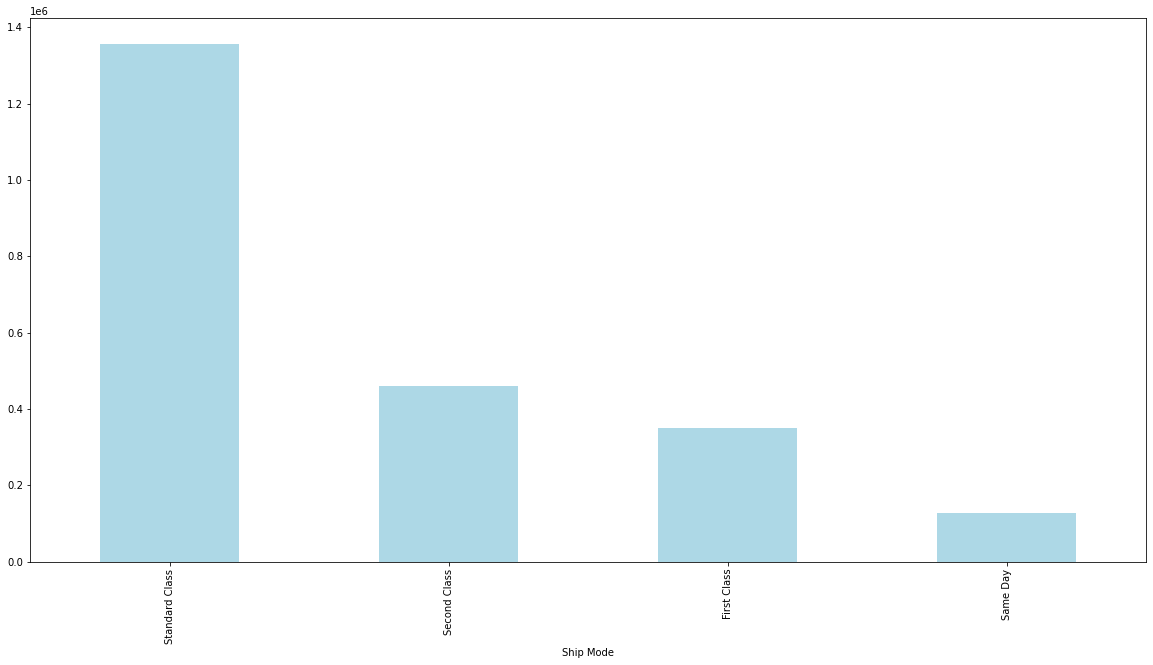

In [107]:
# Ship Mode Vs Sales
df.groupby('Ship Mode').sum()['Sales'].sort_values(ascending=False).plot(figsize=(20,10),kind='bar', color='lightblue')
plt.xticks(rotation=90);

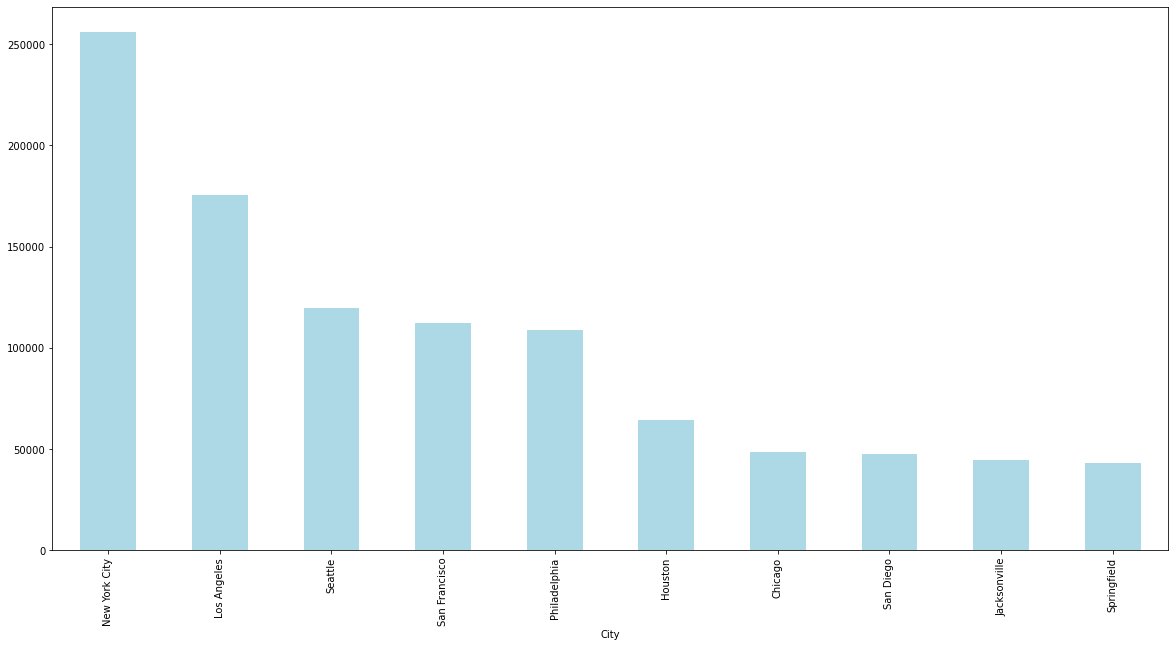

In [102]:
# Top 10 cities of maximum sales
df.groupby('City').sum()['Sales'].sort_values(ascending=False).head(10).plot(figsize=(20,10),kind='bar', color='lightblue')
plt.xticks(rotation=90);

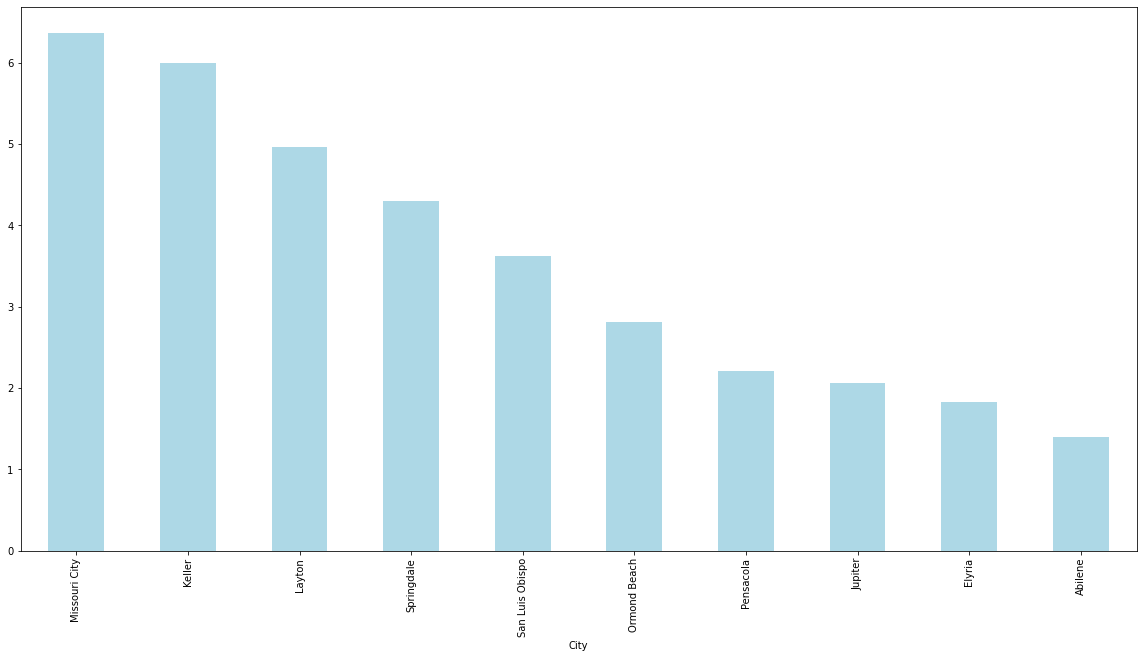

In [104]:
# Top 10 cities with minimum sales
df.groupby('City').sum()['Sales'].sort_values(ascending=False).tail(10).plot(figsize=(20,10),kind='bar', color='lightblue')
plt.xticks(rotation=90);

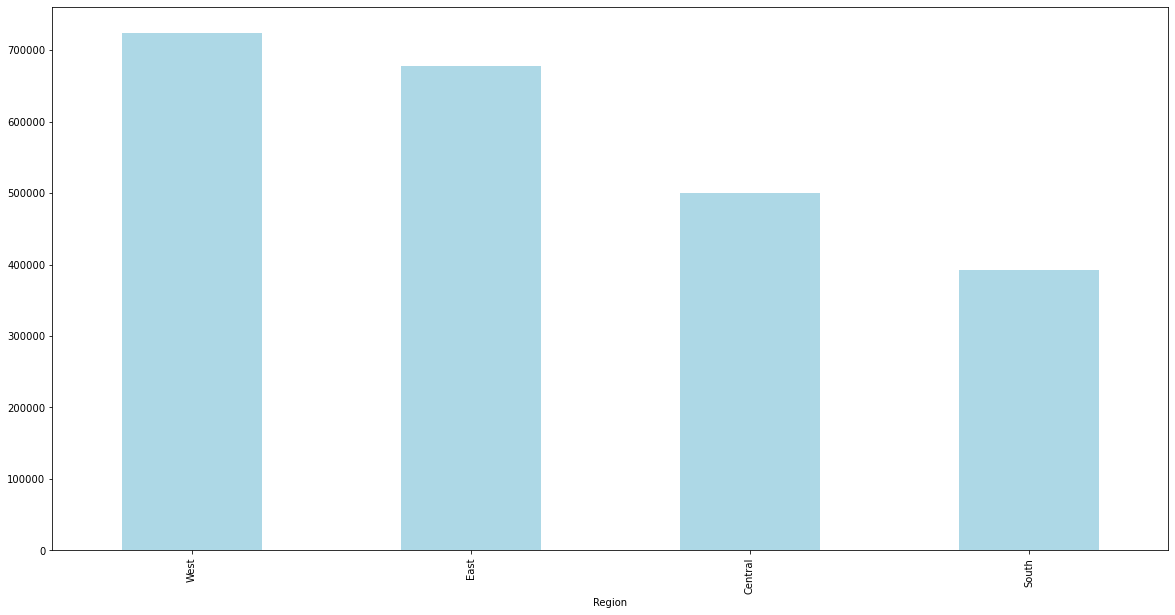

In [108]:
#Region Vs Sales
df.groupby('Region').sum()['Sales'].sort_values(ascending=False).plot(figsize=(20,10),kind='bar', color='lightblue')
plt.xticks(rotation=90);

### Insights From EDA

    - Highly Profitable Cities are - New York City, Los Angeles, Seattle
    - Highly Profitable States are - California, New York, washington
    - Highly Profitable Category - Technology
    - Highly Profitable SubCategory - Copiers
    - Highly Profitable Region - West
    - Highly Profitable Ship Mode - Standard Class
    
    
##### Work areas where we can work to make more profit

- Increase the sales in south region.
- Reduce the sales of Tables, Books Cases as they don't help in the profit growth.

